In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [92]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [93]:
def init_params():
    w1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return w1, b1, w2, b2

In [94]:
def RelU(Z):
    return np.maximum(Z, 0)

def driv_RelU(Z):
    return Z > 0

In [115]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return  A

In [104]:
def forward_pass(w1, b1, w2, b2, X):
    Z1 = w1.dot(X) + b1
    A1 = RelU(Z1)
    Z2 = w2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [97]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() +1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_y = one_hot_Y.T
    return one_hot_y


In [106]:
def backward_pass(Z1, A1,Z2,A2,W1,W2,X,Y):
   # m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    dB2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * driv_RelU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    dB1 = 1/m * np.sum(dZ1)
    return dW1,dB1, dW2, dB2

In [113]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [108]:
def get_predict(A2):
    return np.argmax(A2, 0)

In [109]:
def get_accuracy(preds, Y):
    print(preds, Y)
    return np.sum(preds == Y) / Y.size

In [110]:
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_pass(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_pass(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predict(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [116]:
w1, b1, w2, b2 = gradient_descent(X_train, Y_train, 501, 0.10)

Iteration:  0
[0 3 6 ... 3 2 3] [9 7 6 ... 8 0 4]
0.06053658536585366
Iteration:  50
[5 7 8 ... 5 5 9] [9 7 6 ... 8 0 4]
0.41765853658536584
Iteration:  100
[9 7 6 ... 9 5 9] [9 7 6 ... 8 0 4]
0.5502439024390244
Iteration:  150
[9 7 6 ... 9 5 9] [9 7 6 ... 8 0 4]
0.6474634146341464
Iteration:  200
[9 7 6 ... 8 5 9] [9 7 6 ... 8 0 4]
0.7005121951219512
Iteration:  250
[9 7 6 ... 8 5 9] [9 7 6 ... 8 0 4]
0.7327073170731707
Iteration:  300
[9 7 6 ... 8 5 9] [9 7 6 ... 8 0 4]
0.7569268292682927
Iteration:  350
[9 7 6 ... 9 0 9] [9 7 6 ... 8 0 4]
0.7761463414634147
Iteration:  400
[9 7 6 ... 9 0 9] [9 7 6 ... 8 0 4]
0.7915365853658537
Iteration:  450
[9 7 6 ... 9 0 9] [9 7 6 ... 8 0 4]
0.8062682926829269
Iteration:  500
[9 7 6 ... 9 0 9] [9 7 6 ... 8 0 4]
0.8173658536585365


In [117]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_pass(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


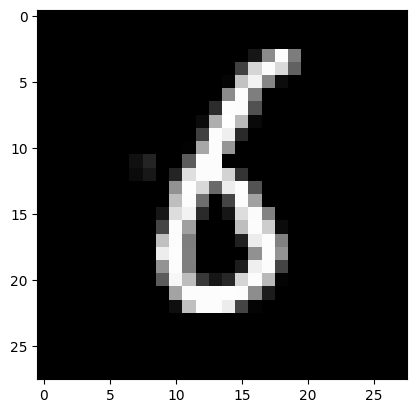

Prediction:  [2]
Label:  2


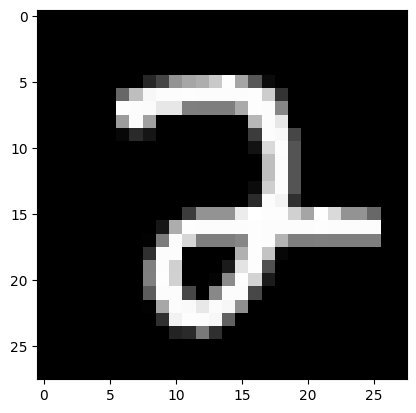

Prediction:  [9]
Label:  9


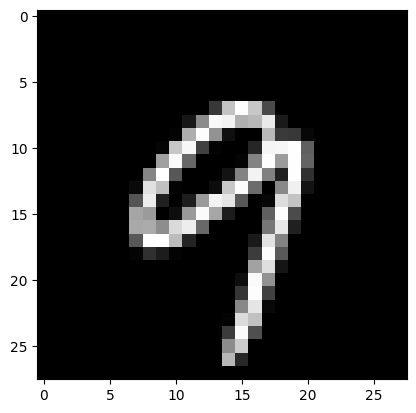

Prediction:  [6]
Label:  5


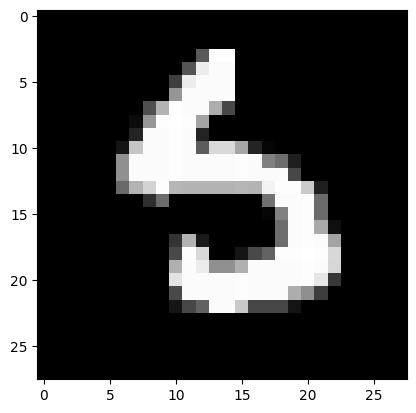

In [120]:
test_prediction(45, W1, b1, W2, b2)
test_prediction(24, W1, b1, W2, b2)
test_prediction(67, W1, b1, W2, b2)
test_prediction(93, W1, b1, W2, b2)

In [121]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 4 2 1 4 6 4 3 6 9 8 7 1 7 7 4 5 8 9 7 7 5 7 5 5 9 4 7 9 9 8 9 0 4 1 6 9
 5 3 8 6 9 8 4 7 7 1 5 2 3 6 6 3 1 4 2 1 9 9 4 4 8 5 6 4 1 4 1 7 9 7 3 7 8
 2 9 6 1 3 4 3 6 0 4 2 4 4 1 6 9 7 3 6 9 8 9 9 0 6 5 4 3 2 4 0 2 5 7 6 7 0
 1 8 0 7 6 1 9 9 9 9 1 4 5 7 1 7 1 4 8 4 4 7 3 1 2 9 2 7 6 2 2 5 0 8 0 2 2
 9 3 0 6 3 8 6 4 6 5 7 3 6 3 2 9 5 5 0 5 0 7 0 4 7 9 4 6 7 8 7 4 3 5 3 2 0
 6 8 4 5 8 5 2 2 3 8 4 9 9 5 5 1 7 1 3 1 4 9 7 1 9 0 8 5 9 7 2 9 1 4 4 3 3
 1 9 8 6 9 2 0 1 5 4 5 9 1 2 1 1 0 0 0 3 9 7 7 8 1 2 2 5 7 9 6 3 8 6 0 9 1
 5 3 6 0 2 5 3 5 1 9 4 4 5 9 3 0 6 9 7 4 9 6 1 0 8 8 0 2 1 6 5 6 1 0 5 2 1
 5 4 7 1 4 1 6 9 2 0 2 5 8 1 6 6 3 1 6 4 1 0 5 3 4 1 1 6 0 0 8 7 2 3 1 0 3
 9 9 5 6 1 2 9 7 6 8 9 0 3 9 0 5 5 2 9 8 3 0 2 2 0 0 2 2 2 2 4 2 6 3 8 0 1
 3 9 4 7 6 2 9 2 2 0 6 4 4 1 2 5 3 8 3 6 9 1 9 1 8 0 7 1 6 6 1 9 5 8 2 5 1
 8 5 3 2 9 0 1 8 3 1 4 8 8 7 7 1 3 0 0 4 5 5 2 2 7 5 0 8 8 1 8 0 3 3 1 7 8
 0 1 9 4 6 4 4 6 6 6 5 8 6 9 1 0 4 2 5 2 2 9 3 1 4 9 8 7 4 9 4 5 5 6 5 7 0
 9 9 1 7 3 4 4 7 9 6 9 3 

0.853